Model X  like Tesla 
정규화는 레이어에서 


In [104]:
import cv2

In [28]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

from keras.models import Sequential,load_model
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Dense, Flatten, experimental, Dropout
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ModelCheckpoint


import pandas as pd 

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


In [29]:
# 데이터 증가
train_data_augmentation = ImageDataGenerator(
#     featurewise_center=True,
    validation_split = 0.2,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1)

#train 데이터 설정 
train_data = train_data_augmentation.flow_from_directory(
        './images2/train',
        target_size = (300,300),
        batch_size=128,
        #color_mode ='rgb',
        classes = ['food','interior', 'exterior'],
        shuffle =True,
        seed = 42,
        class_mode='categorical',
        subset='training')

# validation 데이터 설정
train_data = train_data_augmentation.flow_from_directory(
        './images2/train',
        target_size = (300,300),
        batch_size=128,
        classes = ['food','interior', 'exterior'],
        shuffle =True,

        class_mode='categorical',
        subset='training')


#test 데이터 설정
test_data = ImageDataGenerator().flow_from_directory(
        './images2/test',
        classes = ['food','interior', 'exterior'],
        target_size=(300,300),
        batch_size=32,
        shuffle =True,
        seed = 42,
        class_mode='categorical')

Found 36000 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.


In [76]:
model = Sequential([
Input(shape=(300,300,3), name='input_layer'),
# experimental.preprocessing.Resizing(
# height=1./255, width=1./255, interpolation="nearest", name='resizing_Layer'),
# BatchNormalization(), 
experimental.preprocessing.Rescaling(1./255),
Conv2D(32,(3,3), activation='relu',name='Conv_layer1'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer2'),
Conv2D(32,(3,3), activation='relu',name='Conv_layer3'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer4'),
Conv2D(32,(3,3), activation='relu',name='Conv_layer5'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer6'),
Dropout(0.5),
Conv2D(32,(3,3), activation='relu',name='Conv_layer7'),
Conv2D(32,(3,3), activation='relu',name='Conv_layer8'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer9'),
Flatten(),
Dense(10, activation='relu',name='FC_layer10'),
Dense(3, activation='softmax', name='output_layer')
])


# 3. 모델 학습과정 설정 및 요약
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 32)      9248      
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 32)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 32)        9248      
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 32)       

In [77]:
# 4. 모델 학습
model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=5,
    validation_data=test_generator,
    validation_steps=5)
model.save('model-X')

Epoch 1/5
5/5 [==============================] - 26s 5s/step - loss: 1.0723 - accuracy: 0.4453 - val_loss: 1.0768 - val_accuracy: 0.4313
Epoch 2/5
5/5 [==============================] - 28s 6s/step - loss: 1.0487 - accuracy: 0.4328 - val_loss: 1.0426 - val_accuracy: 0.4125
Epoch 3/5
5/5 [==============================] - 32s 6s/step - loss: 0.9875 - accuracy: 0.4437 - val_loss: 0.9836 - val_accuracy: 0.4437
Epoch 4/5
5/5 [==============================] - 31s 6s/step - loss: 0.9329 - accuracy: 0.4656 - val_loss: 0.9486 - val_accuracy: 0.4563
Epoch 5/5
5/5 [==============================] - 98s 20s/step - loss: 0.9648 - accuracy: 0.4734 - val_loss: 0.9635 - val_accuracy: 0.4812
INFO:tensorflow:Assets written to: model-X\assets


In [84]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Evaluate --
accuracy: 59.38%
-- Predict --
{'food': 0, 'interior': 1, 'exterior': 2}
[[0.660 0.318 0.022]
 [0.383 0.372 0.245]
 [0.330 0.346 0.323]
 [0.331 0.353 0.316]
 [0.343 0.355 0.302]
 [0.331 0.347 0.321]
 [0.342 0.352 0.306]
 [0.331 0.358 0.311]
 [0.392 0.384 0.225]
 [0.340 0.349 0.312]
 [0.386 0.391 0.223]
 [0.317 0.343 0.340]
 [0.343 0.354 0.303]
 [0.442 0.388 0.170]
 [0.516 0.356 0.128]
 [0.351 0.369 0.281]
 [0.742 0.247 0.010]
 [0.321 0.341 0.338]
 [0.353 0.372 0.275]
 [0.354 0.375 0.271]
 [0.369 0.390 0.241]
 [0.327 0.345 0.328]
 [0.445 0.417 0.138]
 [0.516 0.377 0.107]
 [0.433 0.359 0.208]
 [0.534 0.357 0.109]
 [0.340 0.352 0.308]
 [0.569 0.350 0.081]
 [0.333 0.349 0.318]
 [0.610 0.294 0.096]
 [0.323 0.340 0.337]
 [0.666 0.309 0.025]
 [0.317 0.343 0.340]
 [0.330 0.343 0.326]
 [0.635 0.312 0.053]
 [0.524 0.357 0.119]
 [0.461 0.416 0.123]
 [0.626 0.328 0.046]
 [0.603 0.324 0.073]
 [0.610 0.332 0.058]
 [0.922 0.078 0.000]
 [0.801 0.194 0.004]
 [0.498 0.365 0.137]
 [0.545 0

In [86]:
print(type(test_generator))

<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>


In [82]:
print(output.shape)

(160, 3)


In [88]:
x=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
print(x.shape)
print(y.shape)

(9000, 300, 300, 3)
(9000, 3)


In [119]:
def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(9000)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
#     plt.axis("off")
#     plt.imshow(x[test_sample_id])
#      plt.show()
    image = cv2.cvtColor(x[test_sample_id], cv2.COLOR_BGR2RGB)

    pixels = np.array(x[test_sample_id],np.int32)
    plt.imshow(pixels)
    plt.show()

    
    test_image = test_image.reshape(1,300,300,3)
    print(test_generator.class_indices)
    y_actual = y_test[test_sample_id]
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred)

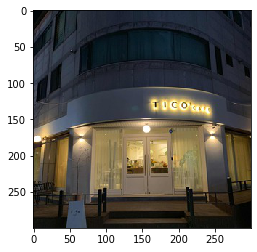

{'food': 0, 'interior': 1, 'exterior': 2}
y_actual number =  [0.000 1.000 0.000]
y_pred =  [[0.000 0.000 1.000]]
y_pred number =  2


In [121]:
if __name__ == '__main__' :
    model = load_model('model-19')
    X_test , y_test = x,y
    predict_image_sample(model,X_test, y_test)

---

In [42]:
# 5. 모델 평가하기

for i in range(4,15):
    model = load_model('model-'+str(i))
    print("-- Evaluate --",'num = ',i)
    scores = model.evaluate_generator(test_data, steps=5)
    print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


-- Evaluate -- num =  4
accuracy: 9.38%
-- Evaluate -- num =  5
accuracy: 37.50%
-- Evaluate -- num =  6
accuracy: 33.13%
-- Evaluate -- num =  7
accuracy: 44.37%
-- Evaluate -- num =  8
accuracy: 57.50%
-- Evaluate -- num =  9
accuracy: 69.38%
-- Evaluate -- num =  10
accuracy: 23.75%
-- Evaluate -- num =  11
accuracy: 45.63%
-- Evaluate -- num =  12
accuracy: 24.38%
-- Evaluate -- num =  13
accuracy: 34.38%
-- Evaluate -- num =  14
accuracy: 63.13%


OSError: SavedModel file does not exist at: model-15/{saved_model.pbtxt|saved_model.pb}

In [44]:

for i in range(16,22):
    model = load_model('model-'+str(i))
    print("-- Evaluate --",'num = ',i)
    scores = model.evaluate_generator(test_data, steps=5)
    print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate -- num =  16
accuracy: 33.75%
-- Evaluate -- num =  17
accuracy: 23.13%
-- Evaluate -- num =  18
accuracy: 56.88%
-- Evaluate -- num =  19
accuracy: 71.88%
-- Evaluate -- num =  20
accuracy: 41.25%
-- Evaluate -- num =  21
accuracy: 38.75%


In [45]:

for i in range(2,6):
    model = load_model('model-16-'+str(i))
    print("-- Evaluate --",'num =16- ',i)
    scores = model.evaluate_generator(test_data, steps=5)
    print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate -- num =16-  2
accuracy: 29.37%
-- Evaluate -- num =16-  3
accuracy: 25.00%
-- Evaluate -- num =16-  4
accuracy: 43.13%
-- Evaluate -- num =16-  5
accuracy: 37.50%


In [61]:
model = load_model('model-9')
# 6. 모델 사용하기
print("-- Predict --")
for i in range(1,9):
    test_data = './images2/test/exterior/exterior8011.jpg'
    output = model.predict(test_data)
    print(output)
#     output = model.predict_generator(test_data)
    np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
    print(test_data.class_indices)


-- Predict --


IndexError: list index out of range

In [71]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(type(X_train), type( y_train), type(X_test),type(y_test))

X_train[32].reshape(28,28,1)
print(X_train[32].shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(28, 28)


In [74]:
a =  mnist.load_data()
print(a.shpae)

AttributeError: 'tuple' object has no attribute 'shpae'